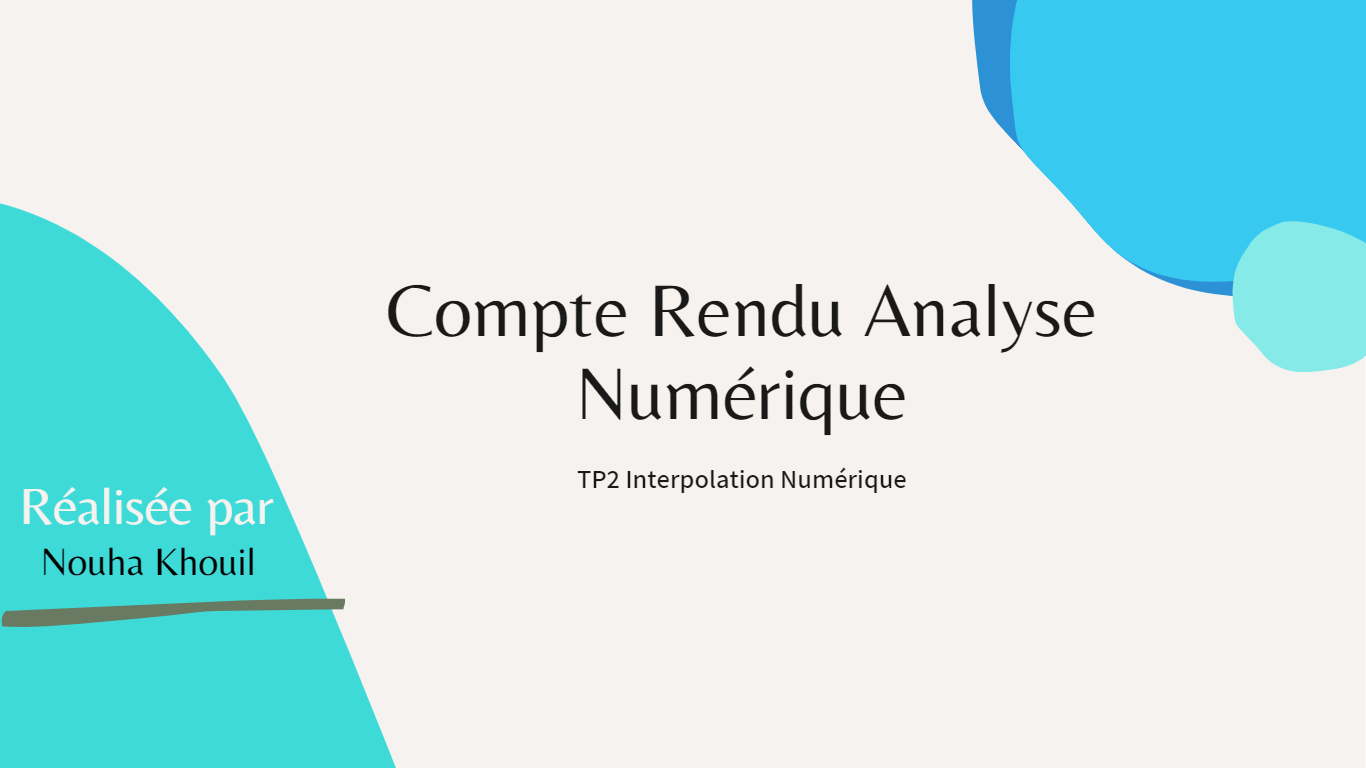

# Définition : 
<p>
l'interpolation est une opération mathématique permettant de remplacer une courbe ou une fonction par une autre courbe (ou fonction) plus simple, mais qui coïncide avec la première en un nombre fini de points (ou de valeurs) donnés au départ.

## Polynômes d’interpolation de Lagrange

Soient $n$ un entier naturel puis $x_{0}, x_{1}, \ldots, x_{n},(n+1)$ complexes deux a deux distincts donnés. Il existe une et une seule famille, notée $\left(\mathrm{L}_{i}\right)_{0} \leq i \leq n,$ de $(n+1)$ polynómes de degré au plus $n$ vérifiant:
$$
\begin{array}{l}
\forall(i, j) \in\left[[0, n ]]^{2}, L_{i}\left(x_{j}\right)=\delta_{i, j}\right. \\
\text { De plus : } \forall(i, j) \in\left[[0, n ]]^{2}, L_{i}=\prod_{j \neq i}\left(\frac{X-x_{j}}{x_{i}-x_{j}}\right)\right.
\end{array}
$$

## Exercice 1

$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

In [71]:
#importation 
from numpy import prod
import numpy as np
import matplotlib.pyplot as plt
import math

In [72]:
def PR(x,y,c):
    S = []
    n = len(x);
    l=[]
    
    for i in range(len(x)):
        l=[c-i for i in x]
        
        for k in range(len(x)):
            if i==k:
                l[k]=1
            else:
                l[k]=l[k]/(x[i]-x[k])
                
        
        S.append(y[i]*np.prod(l))
    return sum(S);

In [73]:
X=[1,2,3,4];
Y=[-1,0,2,1];
for i in (X):
    print(PR(X,Y,i))

-1.0
0.0
2.0
1.0


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

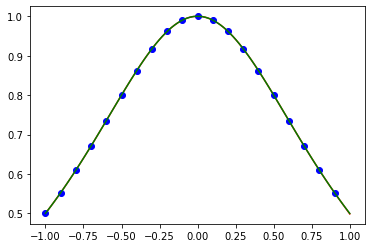

In [75]:
x=np.arange(-1,1,0.1)
f=lambda x:1/(1+x**2)
t=np.linspace(-1,1,100)
y=f(x)
pt=[]
for u in range (len(t)):
    pt.append(PR(x,y,t[u]))

plt.plot(t,pt,'r',x,f(x),'bo',t,f(t),'g')
plt.show()

<b>Nous remarquons que les deux courbes sont exactes

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

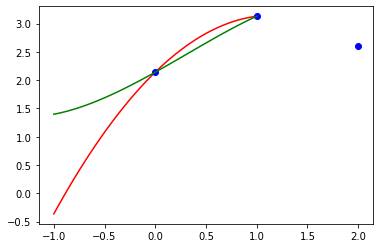

In [55]:
x=np.arange(0,3)
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
t=np.linspace(-1,1,100)
y=[f(xx) for xx in x]
pt=[]
for u in range (len(t)):
    pt.append(PR(x,y,t[u]))
y2=[f(tt) for tt in t]
plt.plot(t,pt,'r',x,y,'bo',t,y2,'g')
plt.show()

<b>Nous remarquons que les deux courbe sont différents

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

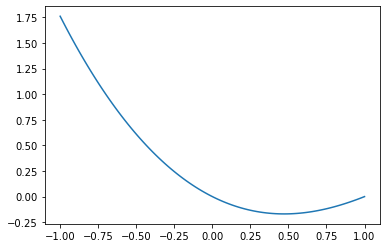

In [52]:
y3=[y2[i]-pt[i] for i in range(len(y2))]
plt.plot(t,y3)
plt.show()

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

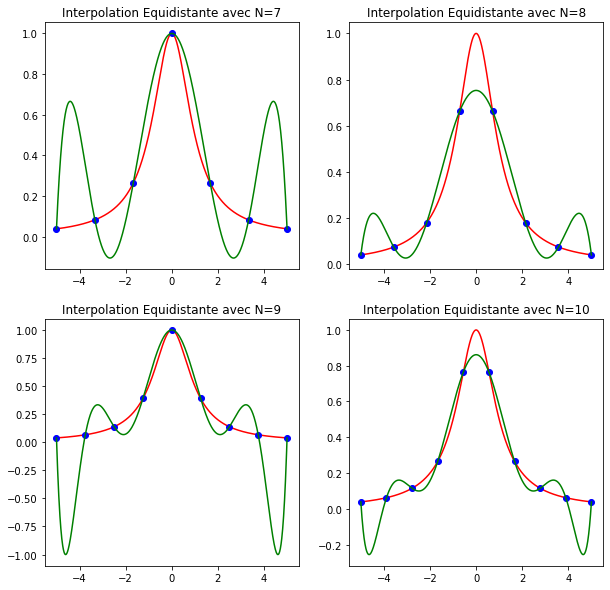

In [63]:
fig = plt.figure(figsize=(10,10))
N=7
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
#############################################
N=8
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000);
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
##############################################
N=9
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
#############################################
N=10
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [60]:
import numpy as np 
def tcheb(a,b,n):
    V=[]
    for k in range(n):  
        V.append((a+b)/2+(a-b)/2*np.cos((k-1)/(n-1)*np.pi))
    return V
print(tcheb(-5,5,11))

[-4.755282581475767, -5.0, -4.755282581475767, -4.045084971874737, -2.938926261462366, -1.5450849718747373, -3.061616997868383e-16, 1.5450849718747368, 2.938926261462365, 4.045084971874736, 4.755282581475767]


C:\Users\khoui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\khoui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\khoui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\khoui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

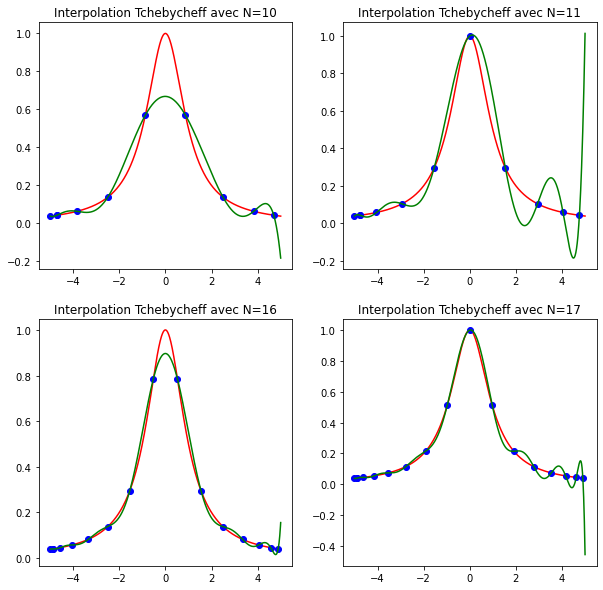

In [69]:
fig = plt.figure(figsize=(10,10))
N=10
X=tcheb(-5,5,N)
Y=[f(x) for x in X]
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
####################################################################################
N=11
X=tcheb(-5,5,N)
Y=[f(x) for x in X]
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
#####################################################################################
N=16
X=tcheb(-5,5,N)
Y=[f(x) for x in X]
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
#####################################################################################
N=17
X=tcheb(-5,5,N)
Y=[f(x) for x in X]
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")

## Exercice 3

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [76]:

def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [77]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
print(f)

[ 0.         -5.          0.66666667 10.5       ]


In [78]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [79]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
f=intNval(x,y,t)
print(f)

[   7. -118.   27.  838.]


## Calcul a la main

$$
P(x)=\frac{x^{3}}{3}+\frac{5 * x^{2}}{3}+\frac{11 * x}{3}+5
$$

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

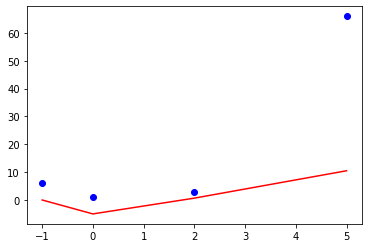

In [82]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y);
plt.plot(x,f,'r',x,y,'ob')

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [84]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
print(p[0])

7.0


4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.

$$p(1) = \frac{32}{3} $$